<a href="https://colab.research.google.com/github/SretenGlavinceski/Linear_Algebra_2024/blob/master/lab_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораториска вежба бр. 3

## Вовед

Векторски потпростор на $\mathbb{R}^n$ е било кое множество $V$ за кое важи:  
1. Нултиот вектор е во $V$ т.е. $\mathbb{0} \in V$;
2. За секое $u, v \in V$, нивниот збир $u + v \in V$;
3. За секој $u \in V$ и за секој скалар $\lambda \in \mathbb{R}$, нивниот производ $\lambda u \in V$.

Значи, векторски потпростор на $R^n$ т.е. $V$ е затворен во однос на собирање на векторите и е затворен во однос на производ на скалар со вектор.

Геометриски тоа значи дека (од 1.) секој векторски потпростор го содржи нултиот вектор, (од 3.) правата од вектори која минува низ произволен вектор во $V$ припаѓа исто во $V$, и крајно (од 2.) ако два вектори не се колинеарни, тогаш рамнината од вектори која минува меѓу нив и координатниот почеток исто припаѓа во $V$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_lines_through_vectors(v1, v2=None, v3=None, line_length=30):
    v1 = np.array(v1)

    plt.figure(figsize=(4, 4))

    line1_x = np.linspace(-line_length, line_length, 100) * v1[0]
    line1_y = np.linspace(-line_length, line_length, 100) * v1[1]
    plt.plot(line1_x, line1_y, color='blue')
    plt.plot(v1[0], v1[1], 'bo')

    x = np.linspace(-line_length, line_length, 100)
    y1 = (v1[1] / v1[0]) * x

    if v2 is not None:
        v2 = np.array(v2)
        line2_x = np.linspace(-line_length, line_length, 100) * v2[0]
        line2_y = np.linspace(-line_length, line_length, 100) * v2[1]
        plt.plot(line2_x, line2_y, color='green')
        plt.plot(v2[0], v2[1], 'go')

        y2 = (v2[1] / v2[0]) * x
        plt.fill_between(x, y1, y2, color='skyblue', alpha=0.75)

    if v3 is not None:
        v3 = np.array(v3)
        line3_x = np.linspace(-line_length, line_length, 100) * v3[0]
        line3_y = np.linspace(-line_length, line_length, 100) * v3[1]
        plt.plot(line3_x, line3_y, color='red')
        plt.plot(v3[0], v3[1], 'ro')

    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.xlim(-line_length * 2, line_length * 2)
    plt.ylim(-line_length * 2, line_length * 2)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.title("Vector Subspace")

    plt.plot(0, 0, 'o', color='black')
    plt.xlim((-5, 5))
    plt.ylim((-5, 5))

    plt.show()

<ipython-input-58-c0f47264d9cc>:15: RuntimeWarning: invalid value encountered in scalar divide
  y1 = (v1[1] / v1[0]) * x


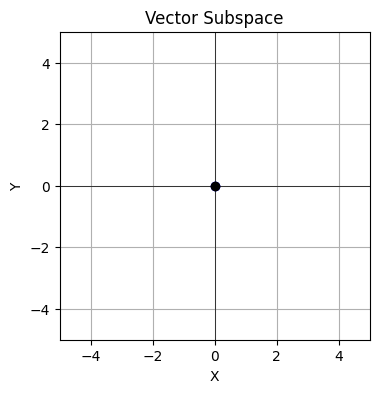

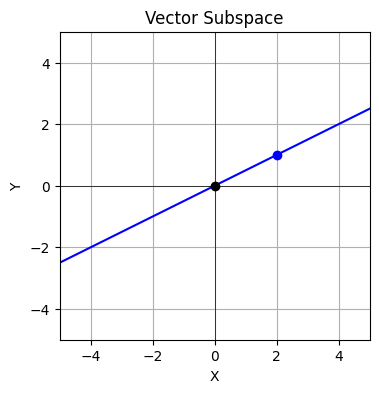

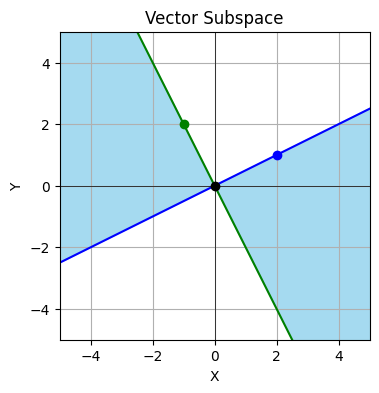

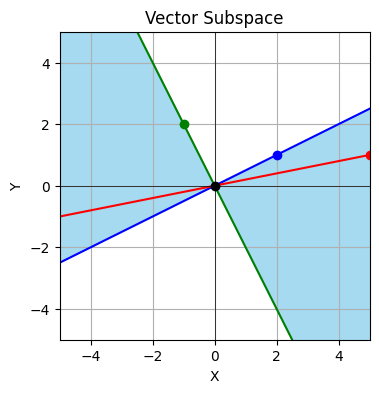

In [ ]:
v1 = (2, 1)
v2 = (-1, 2)
v3 = (5, 1)
plot_lines_through_vectors([0, 0])
plot_lines_through_vectors(v1)
plot_lines_through_vectors(v1, v2)
plot_lines_through_vectors(v1, v2, v3)

Простор на колоните на матрицата $A$ се нарекува множеството $Col ~A$ од сите линеарни комбинации од колоните на $A$.

Нултиот простор на матрицата $A$ се нарекува множеството $Null ~A$ од сите решенија на равенката $Ax = \mathbb{0}$.

За матрица со димензии $m\times n$ важи:  
- $Col ~A \subseteq \mathbb{R}^m$;
- $Nul ~A \subseteq \mathbb{R}^n$.

Геометриски, $Col ~A$ ни го претставува просторот каде се мапираат векторите по трансформација со матрицата $A$.

Додека од друга страна, $Nul ~A$ ни го претставува просторот на вектори кои се мапираат односно редуцираат до нултиот вектор.

<hr>

$$Ax = m \left\{\begin{matrix}~\\ ~\end{matrix} \right.  \overbrace{\begin{bmatrix}1 & 2 & 3 \\ 4 & 5 & 6\end{bmatrix}}^{n} \begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}$$

$Col ~A = span \left\{ \begin{bmatrix}1 \\ 4\end{bmatrix}, \begin{bmatrix}2 \\ 5\end{bmatrix}, \begin{bmatrix}3 \\ 6\end{bmatrix} \right\} \subseteq R^m.$

$Nul ~A = \left\{\left. \begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix} ~\right| ~ Ax = 0\right\} \subseteq R^n. $

<hr>

База на просторот $H$ е линеарно независно подмножество од $H$ за кое важи дека негов покривач е $H$.

Димензијата на $H$, означена со $dim ~H$, е бројот на вектори во било која база на просторот $H$. Со други зборови, димензијата ни кажува колку ортогонални вектори треба да имаме за да го генерираме просторот $H$.

Димензијата на $Col ~A$ се нарекува ранг на матрицата $A$ или $rank ~A$.

Важи следното равенство за матрица $A_{m \times n}$:
$$rank ~A + dim ~Nul~ A = n.$$

Интерпретацијата е следна: од $n$ колони вектори што се користат за да се направи некоја трансформација со матрицата $A$, бројот на вектори кои „преживуваат“ по трансформацијата т.е. не се мапираат во нула векторот е $rank ~A$, додека пак бројот на вектори кои се редуцираат до нула векторот т.е. „не преживуваат“ е $dim ~Nul ~A$.

In [ ]:
import numpy as np

A = np.array([[1, 2, 3], [4, 5, 6]])

columns = A.shape[1]                # Број на колони на `A`
rank = np.linalg.matrix_rank(A)     # Ранг на матрицата `A`
nullity = columns - rank            # Димензија на нултиот простор на матрицата `A`

print(f'rank A ({rank}) + dim Nul A ({nullity}) = #columns ({columns})')


rank A (2) + dim Nul A (1) = #columns (3)


## Основен дел

Изберете точно две од наведените опции.

a) $A = \left\{ \left. \begin{bmatrix}x\\ y\\ z\end{bmatrix}~ \right| ~x + y + z = 0\right\}$ и $B = \left\{ \left. \begin{bmatrix}x\\ y\\ z\end{bmatrix} ~\right| ~x^3 + y^3 + z^3 = 0\right\}$  
б)  $A = \left\{ \left. \begin{bmatrix}x\\ y\\ z\end{bmatrix}~ \right| ~y = 2x, ~ z = 3x\right\}$ и $B = \left\{ \left. \begin{bmatrix}x\\ y\\ z\end{bmatrix} ~\right| ~x + y + z = xyz \right\}$   
в)  $A = \left\{ \left. \begin{bmatrix}x\\ y\\ z\end{bmatrix}~ \right| ~(x-y)^2 = 0 \right\}$ и $B = \left\{ \left. \begin{bmatrix}x\\ y\\ z\end{bmatrix} ~\right| ~(x-y)^2 = z\right\}$   

Прво за секоја опција посебно генерирајте една листа од вектори кои се содржат во множествата $A$ и друга листа за векторите во $B$. Направете го тоа така што за секоја координата во опсег од $-30$ до $30$ ќе проверите дали $x, y, z$ генерираат вектор кој ги исполнува условите на множеството.

Потоа, напишете функција `is_valid_subspace_1` (за $A$) и `is_valid_subspace_2` (за $B$) која како аргумент ќе ги прими тие вектори, и ќе провери дали множествата се векторски потпростори на $\mathbb{R}^3$ преку проверка на правилата за векторски потпростори. Да се врати `True` ако станува збор за векторски потпростор, инаку да се врати првиот случај пронајден од програмата каде не е задоволено некое од својствата.

(За скаларниот производ е доволно да се провери за $\lambda \in \{2, 3\}.$)

In [ ]:
import numpy as np

def generate_A_1_list_vectors():
  return [np.array([x, y, z]) for x in range(-30, 30) for y in range(-30, 30) for z in range(-30, 30) if x + y + z == 0]

def generate_B_1_list_vectors():
  return [np.array([x, y, z]) for x in range(-30, 30) for y in range(-30, 30) for z in range(-30, 30) if pow(x, 3) + pow(y, 3) + pow(z, 3) == 0]

def generate_A_2_list_vectors():
  list_vec = []

  for x in range(-30, 30):
    for y in range(-30, 30):
      for z in range(-30, 30):
        temp_y = 2 * x
        temp_z = 2 * x

        if temp_y == y and temp_z == z:
          list_vec.append(np.array([x, y, z]))

  return list_vec


def generate_B_2_list_vectors():
  return [np.array([x, y, z]) for x in range(-30, 30) for y in range(-30, 30) for z in range(-30, 30) if x + y + z == x * y * z]

def generate_A_3_list_vectors():
  return [np.array([x, y, z]) for x in range(-30, 30) for y in range(-30, 30) for z in range(-30, 30) if pow((x - y), 2) == 0]

def generate_B_3_list_vectors():
  return [np.array([x, y, z]) for x in range(-30, 30) for y in range(-30, 30) for z in range(-30, 30) if pow((x - y), 2) == z]



def list_has_vector(list_vectors, vector):

  for vec in list_vectors:
    if np.array_equal(vector, vec):
      return True

  return False



def is_valid_subspace(list_vectors):
  has_zero_vec = False

  for vec in list_vectors:
    if np.array_equal(np.array([0, 0, 0]), vec):
      has_zero_vec = True

  if not has_zero_vec:
    return (False, "doesn't have zero vector")

  for vec_1 in list_vectors:
    for vec_2 in list_vectors:
      if not np.array_equal(vec_1, vec_2) and not list_has_vector(list_vectors, vec_1 + vec_2):
        return (False, f"Doesn't contain {vec_1} + {vec_2} = {vec_1 + vec_2}")

  for vec in list_vectors:
    if not list_has_vector(list_vectors, vec * 2):
      return (False, f"Doesn't contain {vec} * 2 = {vec * 2}")

    if not list_has_vector(list_vectors, vec * 3):
      return (False, f"Doesn't contain {vec} * 3 = {vec * 3}")

  return (True, "")

def check_sol(list_vectors, exercice):
  sol= is_valid_subspace(list_vectors)

  print(f"for {exercice}")
  if not sol[0]:
    print(sol[1])
  else:
    print("The set is a subspace of R^3")

check_sol(generate_A_1_list_vectors(), "A_1")
check_sol(generate_B_1_list_vectors(), "B_1")
check_sol(generate_A_2_list_vectors(), "A_2")
check_sol(generate_B_2_list_vectors(), "B_2")
check_sol(generate_A_3_list_vectors(), "A_3")
check_sol(generate_B_3_list_vectors(), "B_3")

# print(generate_A_2_list_vectors())



for A_1
Doesn't contain [-30   1  29] + [-30   2  28] = [-60   3  57]
for B_1
Doesn't contain [-29   0  29] + [-29  29   0] = [-58  29  29]
for A_2
Doesn't contain [-15 -30 -30] + [-14 -28 -28] = [-29 -58 -58]
for B_2
Doesn't contain [-29   0  29] + [-29  29   0] = [-58  29  29]
for A_3
Doesn't contain [-30 -30 -30] + [-30 -30 -29] = [-60 -60 -59]
for B_3
Doesn't contain [-30 -30   0] + [-30 -29   1] = [-60 -59   1]



Дали пресек/унија на векторски потпростори е векторски потпростор?

Да се провери користејќи ги множествата и вашите дефинирани функции од претходната задача.

Провери дали следните вектори формираат база над $\mathbb{R}^3$:  
а) $u = [2, 3, 1], ~v = [2, -1, 0], ~w = [0, 2, 4]$  
б) $u = [1, -3, 5], ~v = [6, -18, 30], ~w = [0, 0, 0]$  
в) $u = [0, 3, 1], ~v = [4, -1, 0], ~w = [0, 2, 4]$

Колкава е димензијата на просторот кои векторите го генерираат?

Дали множеството од вектори добиени од спанот на $u, v, w$ се секогаш подмножество на $\mathbb{R}^3$?

Да се размисли како изгледа нултиот векторски простор генериран од матрицата $[u^T, v^T, w^T]$.

In [ ]:
import numpy.linalg

def check_if_basis_R3(matrix):
  rank = np.linalg.matrix_rank(matrix)
  print(f"димензијата на простор {rank}")
  if rank < 3:
    return False

  sol = np.linalg.solve(matrix, np.array([0, 0, 0]))
  return np.all(sol == 0)

matrix_1 = np.array([[2, 2, 0], [3, -1, 2], [1, 0, 4]])
matrix_2 = np.array([[1, 6, 0], [-3, -18, 0], [5, 30, 0]])
matrix_3 = np.array([[0, 4, 0], [3, -1, 2],[1, 0, 4]])

print(check_if_basis_R3(matrix_1))
print(check_if_basis_R3(matrix_2))
print(check_if_basis_R3(matrix_3))


3
True
1
False
3
True


### Големиот проблем кај нумеричката пресметка со матрици

Дадена е матрицата $A = \begin{bmatrix}1 & 2 \\ 1 & x\end{bmatrix}$.

Да се пресмета рангот на матрицата за следните вредности:  
a) $3$;  
б) $2$;  
в) $1.999999999999999$ т.е. $2 - 1e\text{-}15$.

Дискутирај го резултатот.

In [ ]:
import numpy as np

A_1 = np.array([[1, 2], [1, 3]])
A_2 = np.array([[1, 2], [1, 2]])
A_3 = np.array([[1, 2], [1, 1.999999999999999]])

rank_1 = np.linalg.matrix_rank(A_1)
rank_2 = np.linalg.matrix_rank(A_2)
rank_3 = np.linalg.matrix_rank(A_3)

print("Rank x = 3:", rank_1)
print("Rank x = 2:", rank_2)
print("Rank x = 1.999999999999999:", rank_3)

Rank x = 3: 2
Rank x = 2: 1
Rank x = 1.999999999999999: 1


(Опционална задача)

Дали пресек/унија на множества кои **не** се векторски потпростори може да даде векторски потпростор на $\mathbb{R}^n$?

In [ ]:
# не пример доколку имаме две множества кои не го содржат нултиот вектор, и нивната унија/пресек не го содржи па
# со тоа првиот услов з потпростори не е исполнет

## Практичен дел


### Сличност на документи

Претставување на документи во посебни векторски простори ни дозволува на лесен начин да ги идентификуваме оние документи кои се слични.

Во оваа вежба е потребно да најдете 5 текстови (стрингови) кои ќе ги анализираме. Пробајте прво со кратки стрингови (не повеќе од 10 зборови), а потоа и со цели текстови.

Во прилог следува помошен код за споредување на сличност.

Како работи `tfidf`? Во што се трансформираат зборовните вектори?

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

documents = [
    "Machine learning is fascinating",
    "Deep learning is a subset of machine learning",
    "Artificial intelligence is the future",
    "Data science and AI are closely related",
    "Machine learning is used in various fields"
]

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

k = 5 # Избери го бројот на кластери
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

labels = kmeans.labels_

for i, doc in enumerate(documents):
    print(f"Document {i + 1}: Cluster {labels[i]} -> {doc[:100]}")


Document 1: Cluster 2 -> Machine learning is fascinating
Document 2: Cluster 0 -> Deep learning is a subset of machine learning
Document 3: Cluster 4 -> Artificial intelligence is the future
Document 4: Cluster 1 -> Data science and AI are closely related
Document 5: Cluster 3 -> Machine learning is used in various fields


### Фуриеова трансформација


Фуриеовата трансформација е математичка алатка која ни овозможува да претвориме функција или сигнал од временски домен во фреквентен домен.

Оваа трансформација е особено корисна во анализа на периодични сигнали, бидејќи секој сигнал може да се разбие на сума од синусоидални функции со различни фреквенции, амплитуди и фази.

Трансформацијата ни дозволува да преминеме од векторски простор каде ја разгледуваме функцијата со нејзините зададени вредности во време $t$, во векторски простор каде секоја компонента се однесува на амплитудата на синусоидален сигнал кој ја претставува оригиналната функција.

На сликата е прикажана функција во временски домен (лево), нејзиното разбивање на синусоидални функции (средина) кои имаат различни фреквенции, и крајно фреквентен домен (десно) каде се прикажани колку од секоја фреквенција се појавува во оригиналниот сигнал.

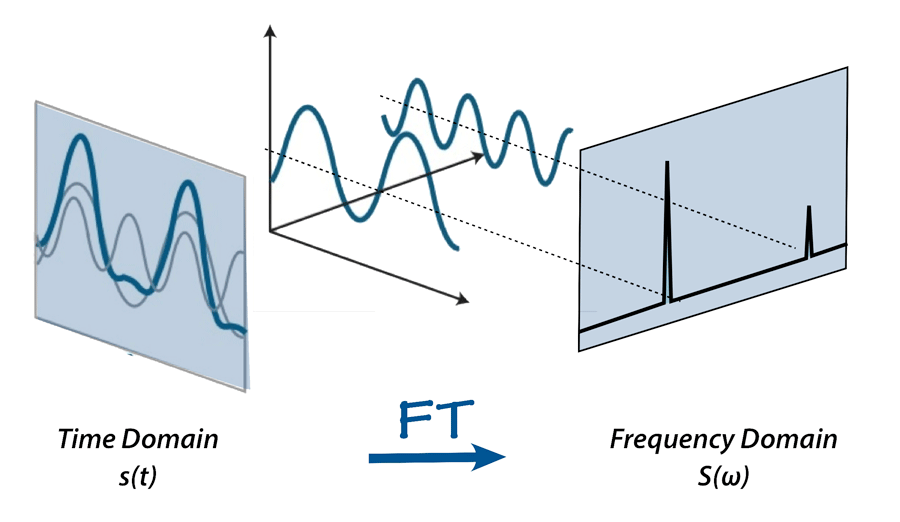

Прво, дефинирај произволен синусоидален сигнал и претстави го во двата домена (временски и фреквентен).

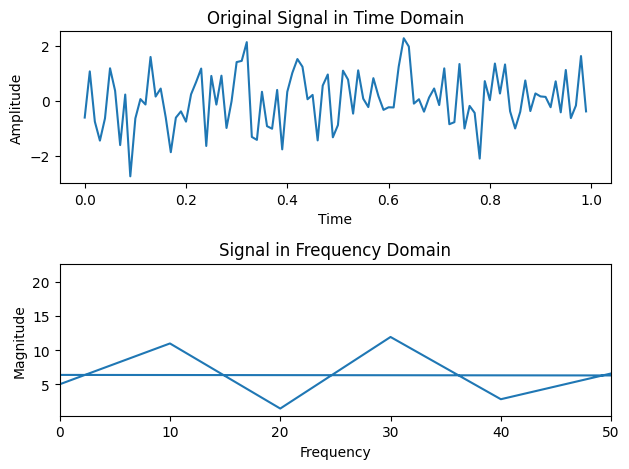

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0, 1, 0.01)
frequency = 100
signal = np.sin(2 * np.pi * frequency * t) + np.random.normal(0, 1, len(t))  # Додавање шум на сигналот

freq_domain = np.fft.fft(signal)
freq = np.fft.fftfreq(len(t), 0.001)

plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title("Original Signal in Time Domain")
plt.xlabel("Time")
plt.ylabel("Amplitude")

plt.subplot(2, 1, 2)
plt.plot(freq, np.abs(freq_domain))
plt.title("Signal in Frequency Domain")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.xlim(0, 50)
plt.tight_layout()
plt.show()



Следно, користејќи ја библиотеката `scipy`, вчитај произволна `wav` гласовна датотека (аудио) и одреди го фреквентниот домен.

<ipython-input-12-f55c2937ccdb>:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, data = wavfile.read(file_path)


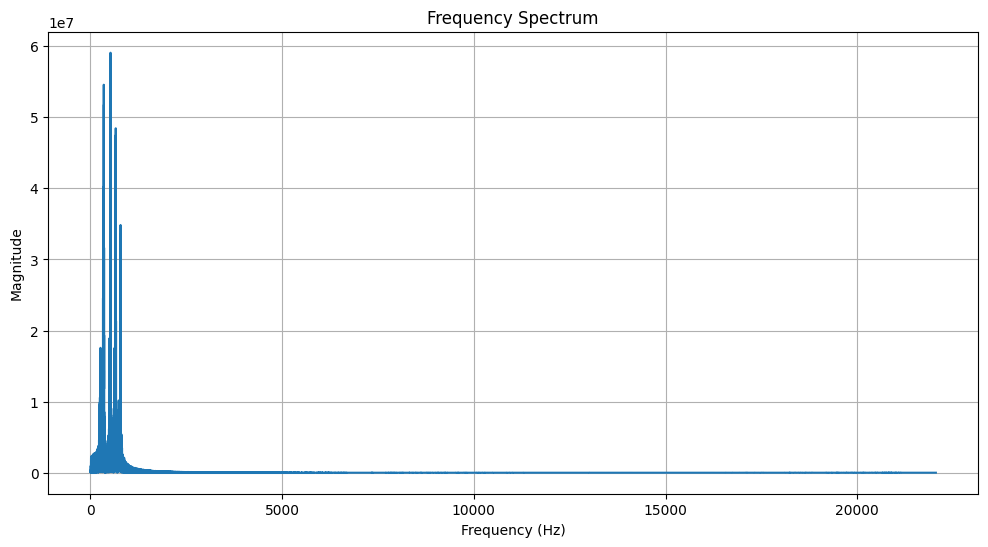

In [12]:
from scipy.io import wavfile

file_path = "./sample_data/sample.wav"
sampling_rate, data = wavfile.read(file_path)

if len(data.shape) > 1:
    data = data[:, 0]  # Ако е стерео, земи само еден канал

N = len(data)
fft_data = np.fft.fft(data)
frequencies = np.fft.fftfreq(N, d=1/sampling_rate)

plt.figure(figsize=(12, 6))
plt.plot(frequencies[:N // 2], np.abs(fft_data)[:N // 2])  # Plot only the positive frequencies
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()


